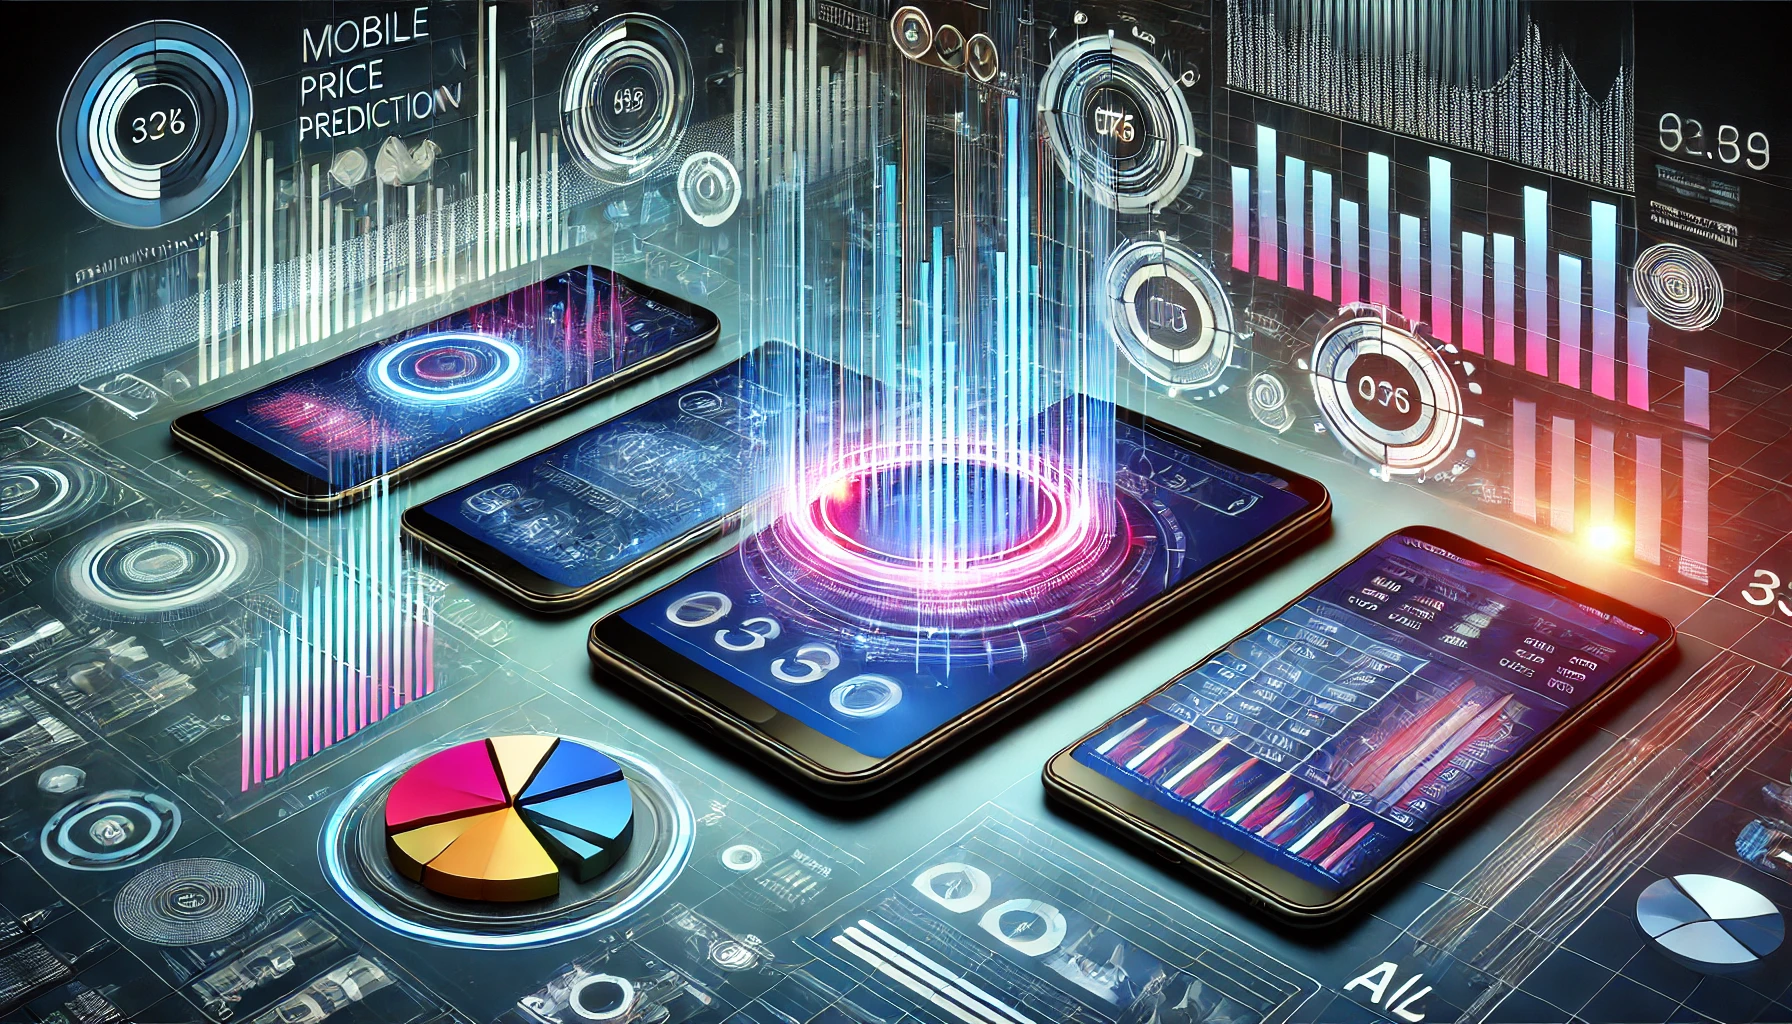

# 1. Problem Description:

We aim to enter the mobile phone industry and compete with leading brands such as Apple and Samsung. During the initial stages of establishing our company, we realized the importance of estimating phone prices based on various specifications to determine competitive pricing for our products.
Our goal is to identify relationships between different features and create price ranges for mobile phones. By implementing machine learning models, we aim to predict the price range of mobile phones, providing us with valuable insights to better analyze the market and position our products effectively.gh cost)
3 (very high cost)

# 2. Dataset columns:

##### id - ID
##### battery_power - Total energy a battery can store in one time measured in mAh
##### blue - Has bluetooth or not
##### clock_speed - Speed at which microprocessor executes instructions
##### dual_sim - Has dual sim support or not
##### fc - Front Camera mega pixels
##### four_g - Has 4G or not
##### int_memory - Internal Memory in Gigabytes
##### m_dep - Mobile Depth in cm
##### mobile_wt - Weight of mobile phone
##### n_cores - Number of cores of processor
##### pc - Primary Camera mega pixels
##### px_height - Pixel Resolution Height
##### px_width - Pixel Resolution Width
##### ram - Random Access Memory in Megabytes
##### sc_h - Screen Height of mobile in cm
##### sc_w - Screen Width of mobile in cm
##### talk_time - Longest time that a single battery charge will last when you are
##### three_g - Has 3G or not
##### touch_screen - Has touch screen or not
##### wifi - Has wifi or not
##### price_range - This is the target variable with value of:
##### 0 (low cost)
##### 1 (medium cost)
##### 2 (high cost)
##### 3 (very high cost)

# 3. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.colors as mcolors
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import plotly.express as px    
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors

# 4. Read datasets

In [2]:
train= pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
test= pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [3]:
test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

# 5. Create dataframe

In [4]:
df = pd.DataFrame(train)
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

# 6. Data Pre-Processing

## 6.1. Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 6.2. Data statistics

In [6]:
df.describe().T.style.background_gradient(cmap='Blues', axis=1)

## 6.3. Check hidden characters in column's name

In [7]:
for col in df.columns:
    print(repr(col))

'battery_power'
'blue'
'clock_speed'
'dual_sim'
'fc'
'four_g'
'int_memory'
'm_dep'
'mobile_wt'
'n_cores'
'pc'
'px_height'
'px_width'
'ram'
'sc_h'
'sc_w'
'talk_time'
'three_g'
'touch_screen'
'wifi'
'price_range'


## 6.4. Check duplicates

In [8]:
duplicates = df.duplicated()
if duplicates.any():
    print ("Duplicates exist")
else:
    print("Duplicates do not exist")

Duplicates do not exist


## 6.5. Check number of unique values

In [9]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 6.6. Count the number of categorical features¶

In [10]:
df_categorical = df[['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']]
unique_values = df_categorical.apply(pd.Series.unique)
unique_values 

blue                              [0, 1]
dual_sim                          [0, 1]
four_g                            [0, 1]
n_cores         [2, 3, 5, 6, 1, 8, 4, 7]
three_g                           [0, 1]
touch_screen                      [0, 1]
wifi                              [1, 0]
dtype: object

## 6.7. Count the number of numerical features

In [11]:
df_numeric = df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']]

min= {}
max= {}
for i in df_numeric: 
    min[i] = df_numeric[i].min()
    max[i] = df_numeric[i].max()
    #print("Column: {} \nMin: {} \nMax: {}\n".format(i, min[i], max[i]))  
    table = pd.DataFrame({ "Min": min, "Max": max})

print(table)

                 Min     Max
battery_power  501.0  1998.0
clock_speed      0.5     3.0
fc               0.0    19.0
int_memory       2.0    64.0
m_dep            0.1     1.0
mobile_wt       80.0   200.0
n_cores          1.0     8.0
pc               0.0    20.0
px_height        0.0  1960.0
px_width       500.0  1998.0
ram            256.0  3998.0
sc_h             5.0    19.0
sc_w             0.0    18.0
talk_time        2.0    20.0
price_range      0.0     3.0


# 7. Visualization

## 7.1. Plot Pie chartfor each categorical variable

In [12]:
df_categorical = df[['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', "price_range"]]

# Create subplots with 3x3 grid
fig = make_subplots(rows=3, cols=3, specs=[[{'type': 'domain'}]*3]*3, vertical_spacing=0.05, horizontal_spacing=0.01)

# Loop through features and add pie charts to subplots
for i, feature in enumerate(df_categorical.columns):
    value_counts = df_categorical[feature].value_counts()

    # Define color map based on blue color
    cmap = colors.LinearSegmentedColormap.from_list("lightblue", ["lightblue", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(value_counts))
    color_list = [colors.rgb2hex(cmap(norm(j))) for j in range(len(value_counts))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=value_counts.index,
        values=value_counts.values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=2)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,
        title_font=dict(size=20)
    )

    # Determine subplot position
    row, col = i // 3 + 1, i % 3 + 1
    fig.add_trace(pie_chart, row=row, col=col)

# Update layout settings
fig.update_layout(showlegend=False, height=1000, width=980, 
                  title=dict(
                      text="Distribution of Categorical Variables",
                      y=0.95, x=0.5, xanchor='center', yanchor='top',
                      font=dict(size=28)
                  ))

# Show plot
fig.show()

In [13]:
num_columns = df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

cat_columns = df[['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi' , 'price_range']]

## 7.2. Pair Plot

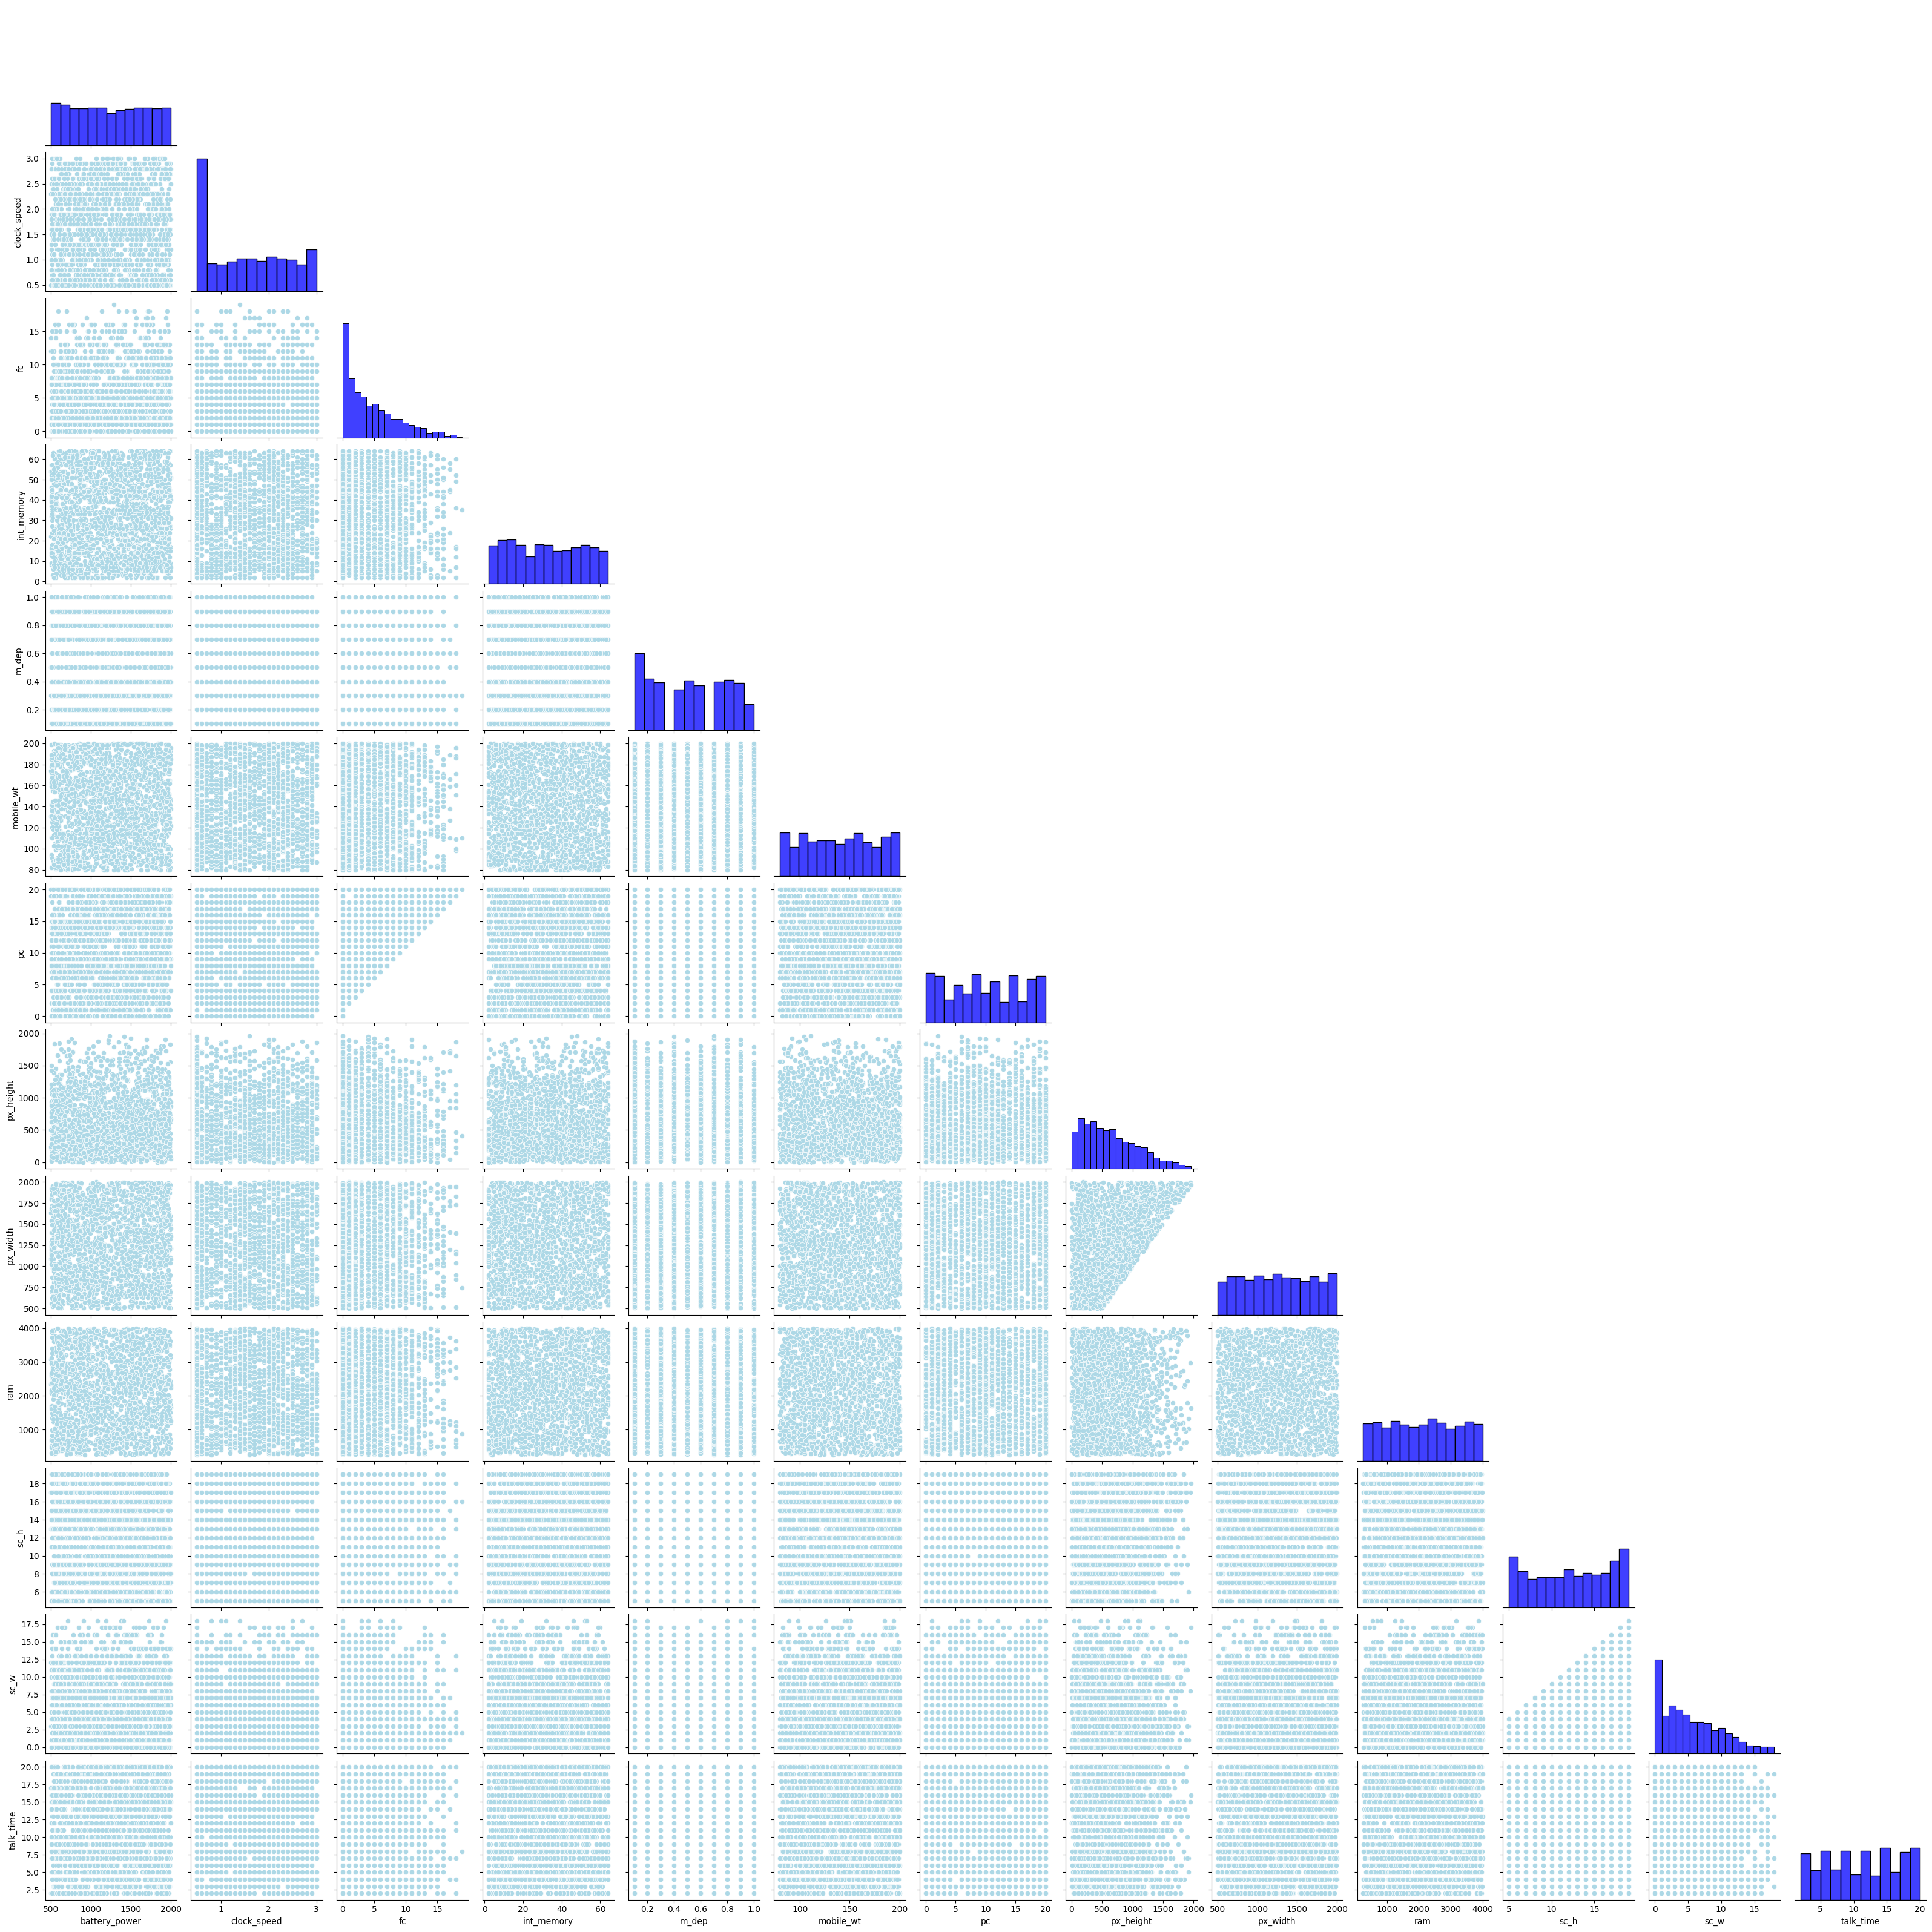

In [14]:
sns.pairplot(data=num_columns, 
             corner=True, 
             plot_kws={'color': 'lightblue'},  # Color for scatter plots
             diag_kws={'color': 'blue'})  # Color for diagonal histograms

# Show the plot
plt.show()

## 7.3. Histogram plots of numerical variables

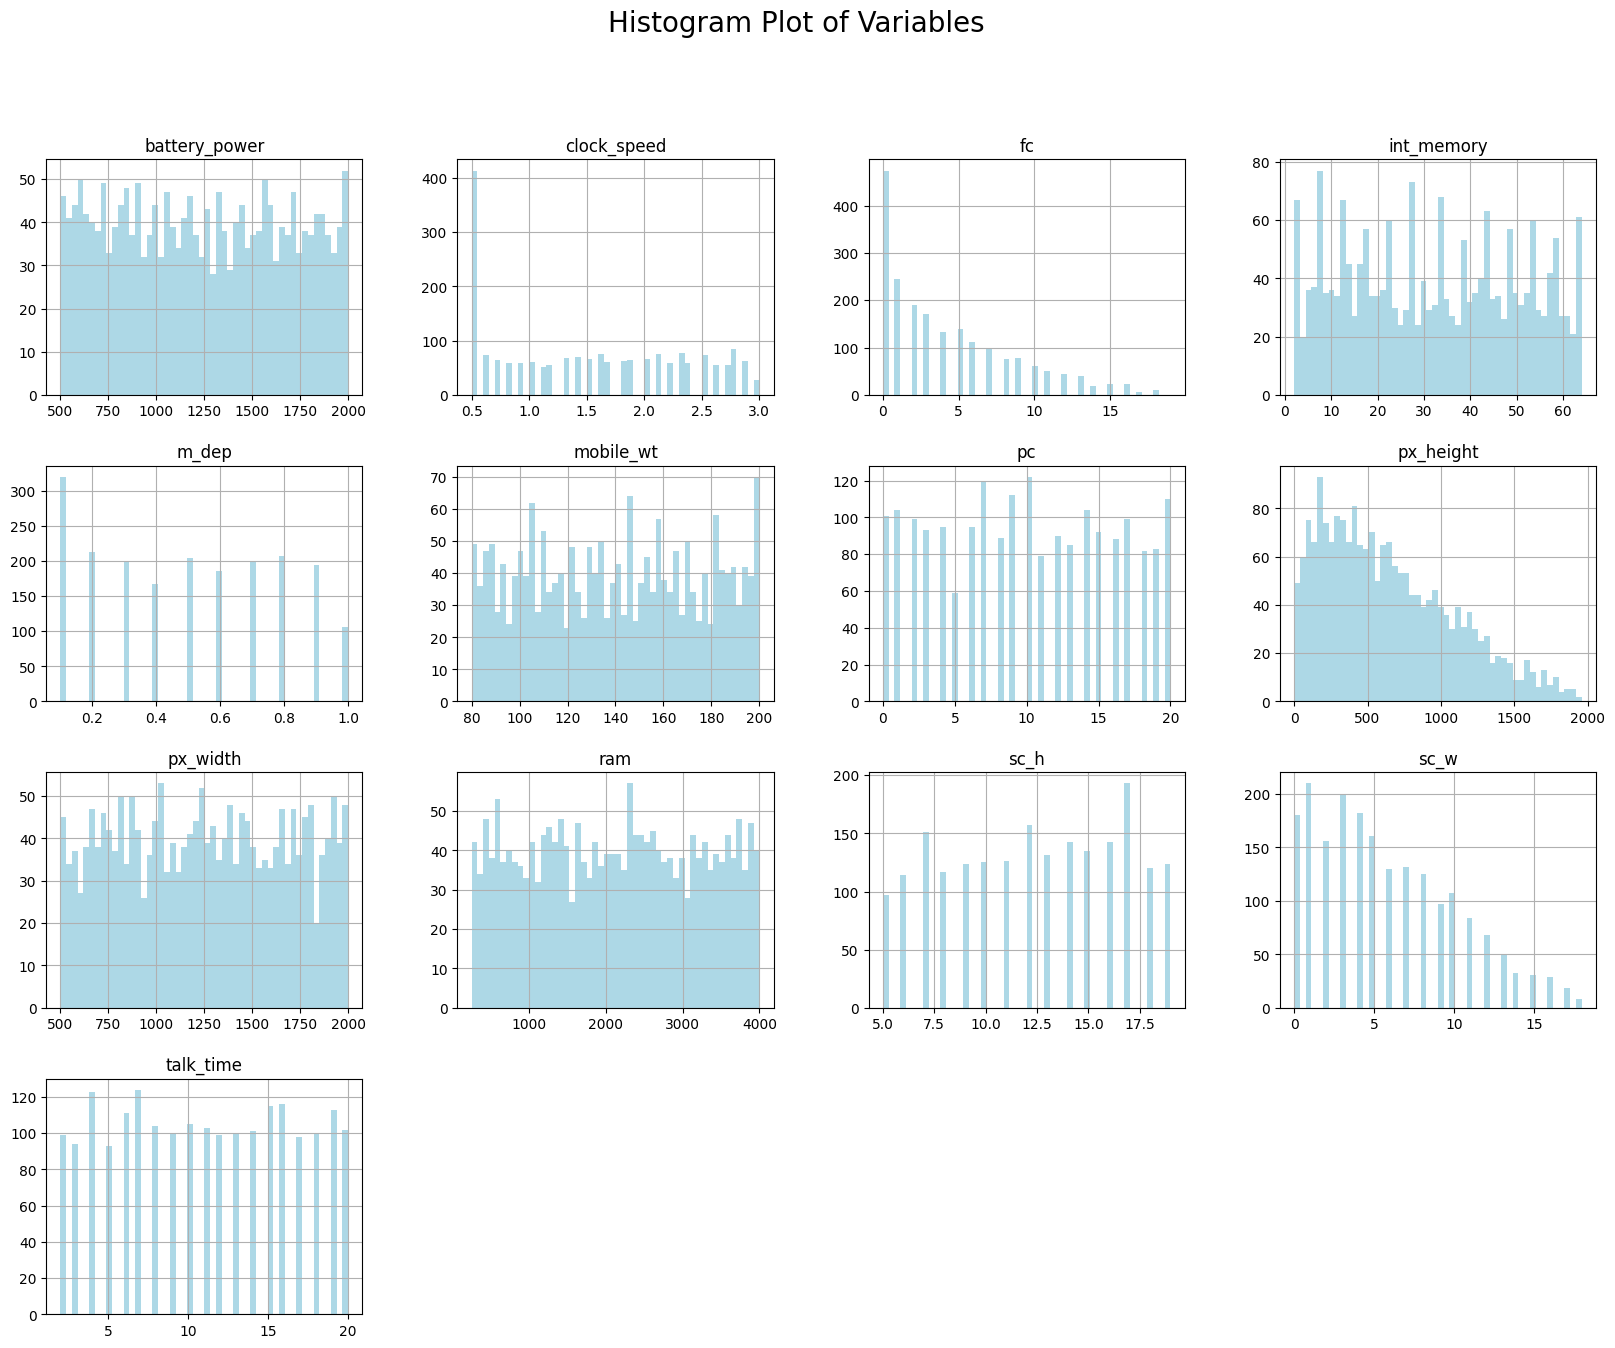

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
num_columns.hist(bins=50, figsize=(20,15) , color='lightblue')
plt.suptitle("Histogram Plot of Variables", fontsize=20)
plt.show()

## 7.4. Countplot of categorical variables

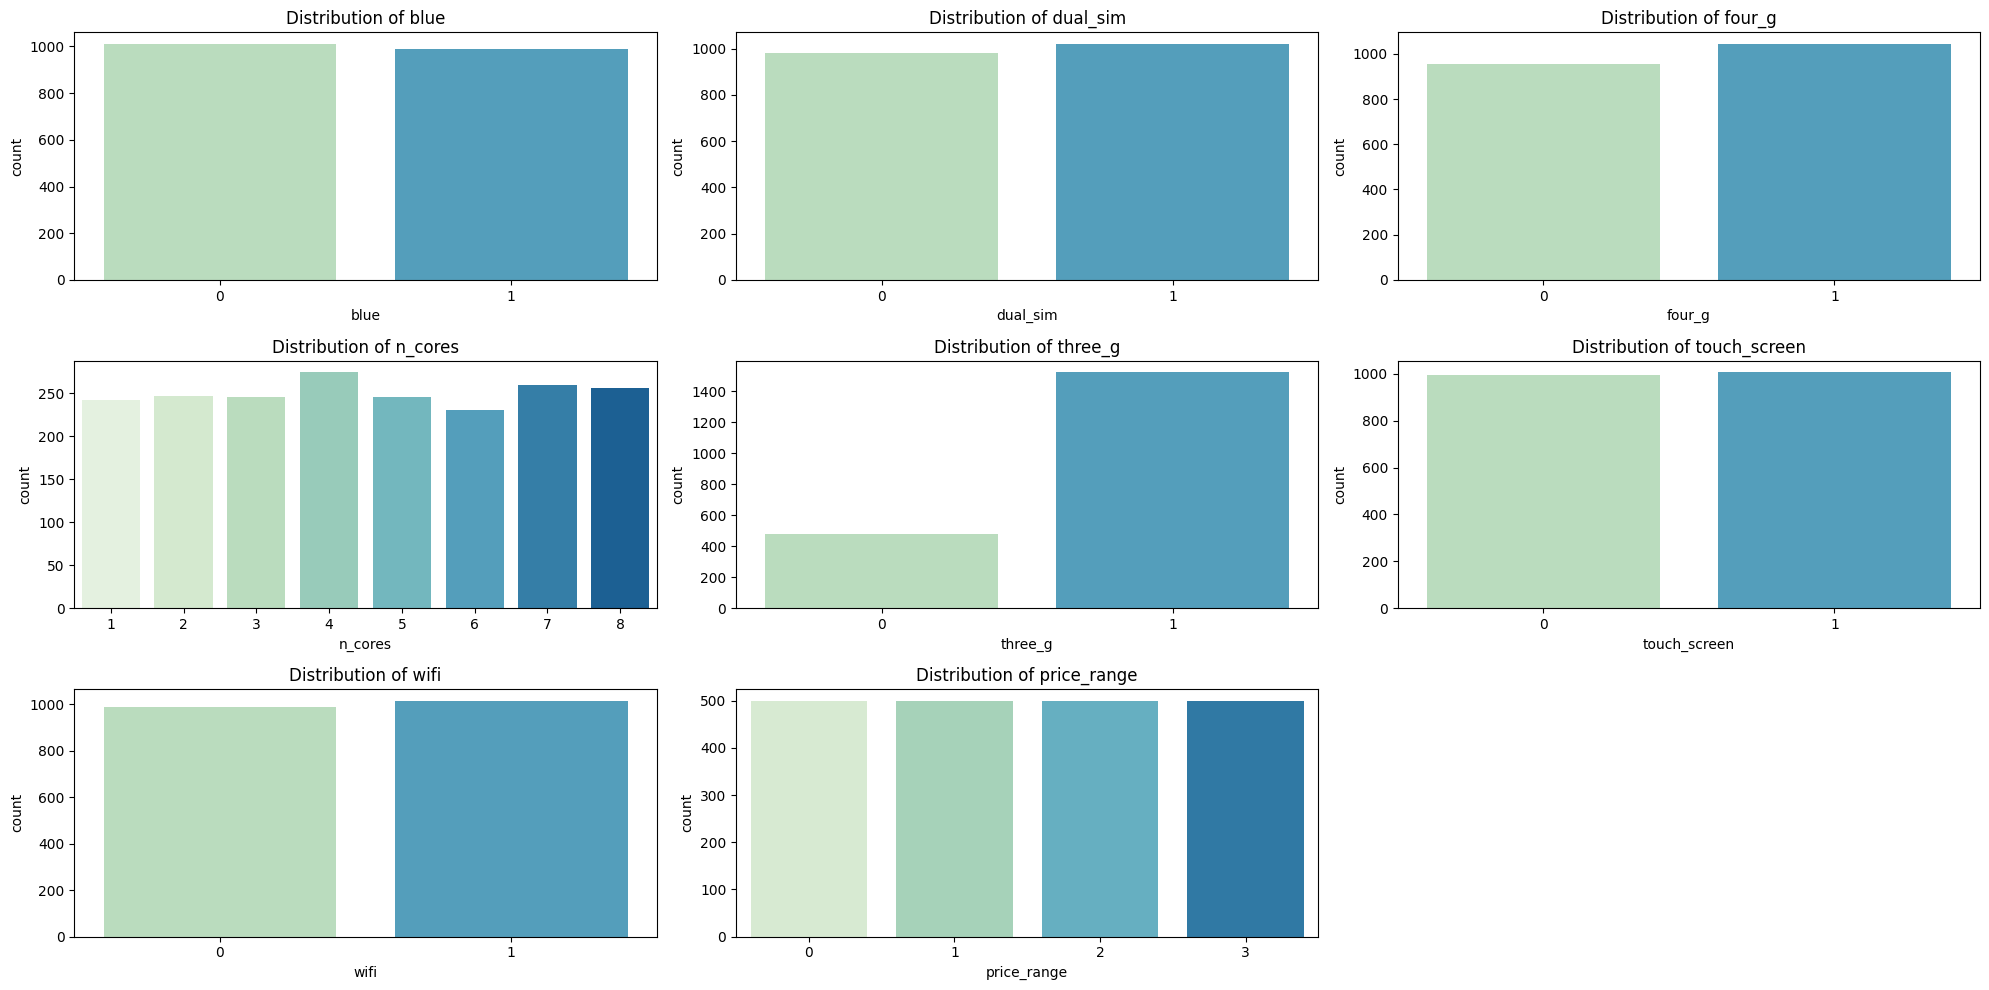

In [16]:

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

for idx, col in enumerate(cat_columns):
    row = idx // 3  # Determine the row number (0 or 1)
    col_pos = idx % 3  # Determine the column number (0, 1, or 2)
    
    sns.countplot(data = cat_columns , x=col, palette='GnBu', ax=axes[row, col_pos])

    # Set title for each subplot
    axes[row, col_pos].set_title(f'Distribution of {col}')

# Turn off the unused 9th subplot
axes[2, 2].axis('off')  # The last subplot is at position (2, 2) in a 3x3 grid

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## 7.5. Countplot of numercial variables

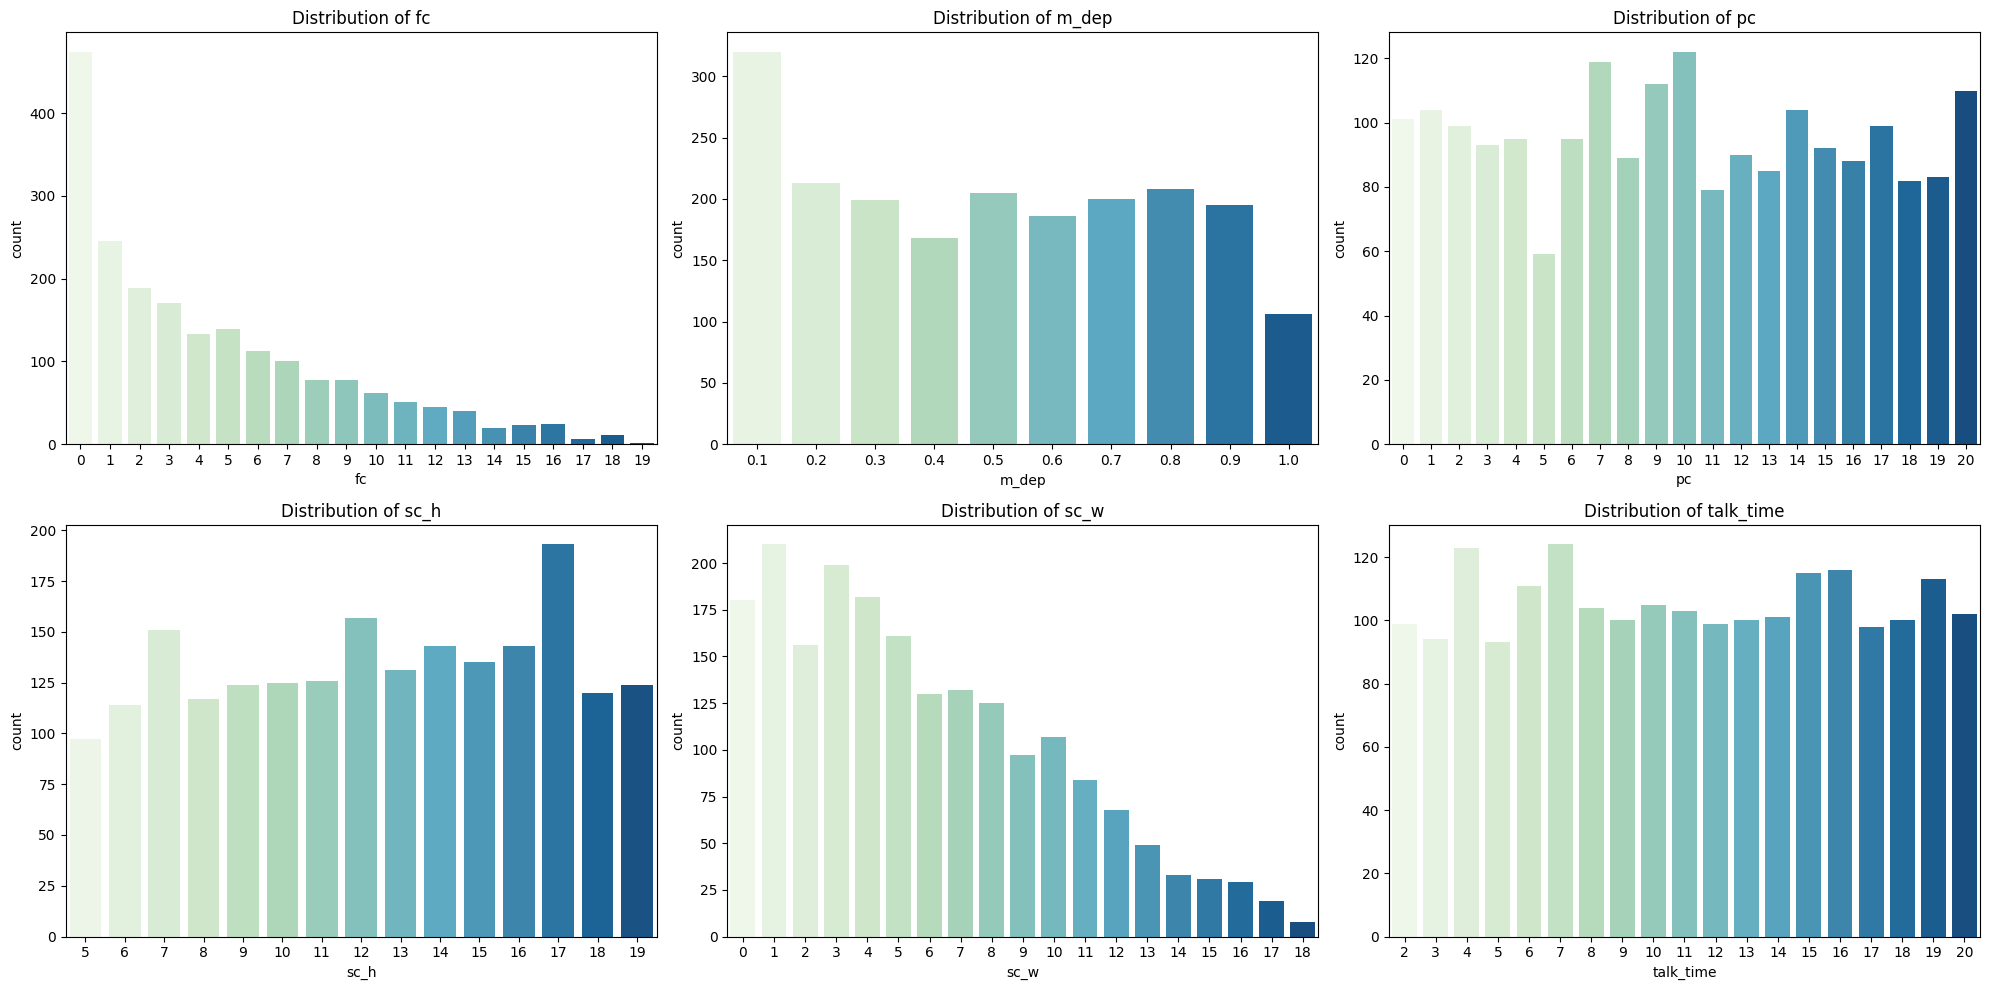

In [17]:
num1_columns = df_numeric = df[['fc', 'm_dep', 'pc', 'sc_h', 'sc_w', 'talk_time']]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for idx, col in enumerate(num1_columns):
    row = idx // 3  # Determine the row number (0 or 1)
    col_pos = idx % 3  # Determine the column number (0, 1, or 2)
    
    sns.countplot(data = num1_columns , x=col, palette='GnBu', ax=axes[row, col_pos])

    # Set title for each subplot
    axes[row, col_pos].set_title(f'Distribution of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## 7.6. Countplot of Ram va price_range

<Axes: title={'center': 'Countplot of Ram va price_range'}, xlabel='ram', ylabel='count'>

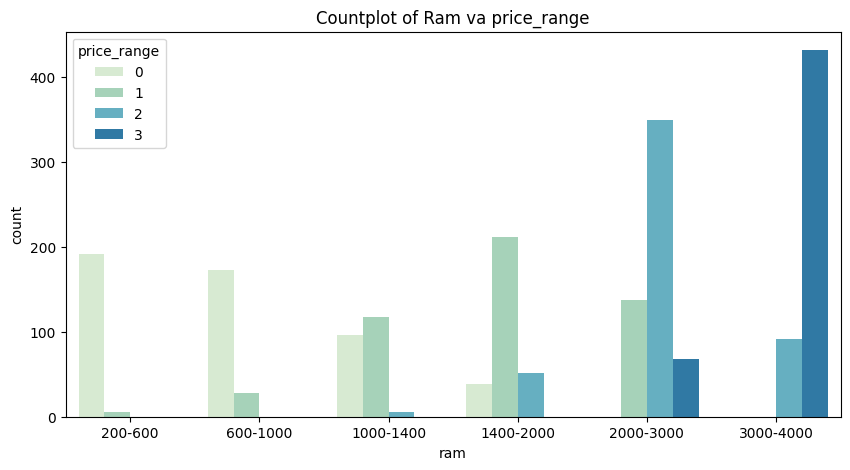

In [18]:
bins=pd.cut(df["ram"],bins=[200,600,1000,1400,2000,3000,4000],labels=["200-600","600-1000","1000-1400","1400-2000","2000-3000","3000-4000"])
plt.figure(figsize=(10,5))
plt.title('Countplot of Ram va price_range')
sns.countplot(x=bins,data=df,hue="price_range",palette='GnBu')

## 7.7. Scatterplot of RAM, Battery Power, and Price Range

In [19]:
# Assuming your DataFrame is named 'df'

plt = px.scatter(df, x="ram", y="battery_power",
                 size="talk_time", color="price_range", size_max=15,
                 color_continuous_scale="GnBu", hover_data=df[['mobile_wt']],
                 template='plotly_white',
                 title="Scatterplot of RAM, Battery Power, and Price Range",
                 width=1000, height=500)

# Update layout to customize title font size and position
plt.update_layout(
    title={
        'text': plt.layout.title.text,  # Preserve original title text
        'x': 0.5,  # Center the title horizontally (0 to 1)
        'y': 0.9,  # Position the title near the top (0 to 1)
        'xanchor': 'center',  # Anchor title horizontally to center
        'yanchor': 'top',  # Anchor title vertically to top
        'font': {'size': 20}  # Increase title font size
    }
)

plt.show()

## 7.8. Scatterplot of px_height, px_width, and Price Range

In [20]:
# Assuming your DataFrame is named 'df'
fig = px.scatter(df, x="px_height", y="px_width",
                 size="talk_time", color="price_range", size_max=15,
                 color_continuous_scale="GnBu", hover_data=df[['mobile_wt']],
                 template='plotly_white',
                 title="Scatterplot of px_height, px_width, and Price Range",
                 width=1000, height=500)

# Update layout to customize title font size and position
fig.update_layout(
    title_text=fig.layout.title.text,  # Preserve original title text
    title_font=dict(size=24),  # Adjust font size to your preference
    title_x=0.5,  # Center the title horizontally
    title_y=0.9,  # Position the title closer to the top (adjust as needed)
)

fig.show()

In [21]:
cat_columns.dtypes

blue            int64
dual_sim        int64
four_g          int64
n_cores         int64
three_g         int64
touch_screen    int64
wifi            int64
price_range     int64
dtype: object

## 7.9. Countplot of categorical variables price range values(0,1,2,3)

In [22]:
num_columns = df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

cat_columns = df[['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi' , 'price_range']]

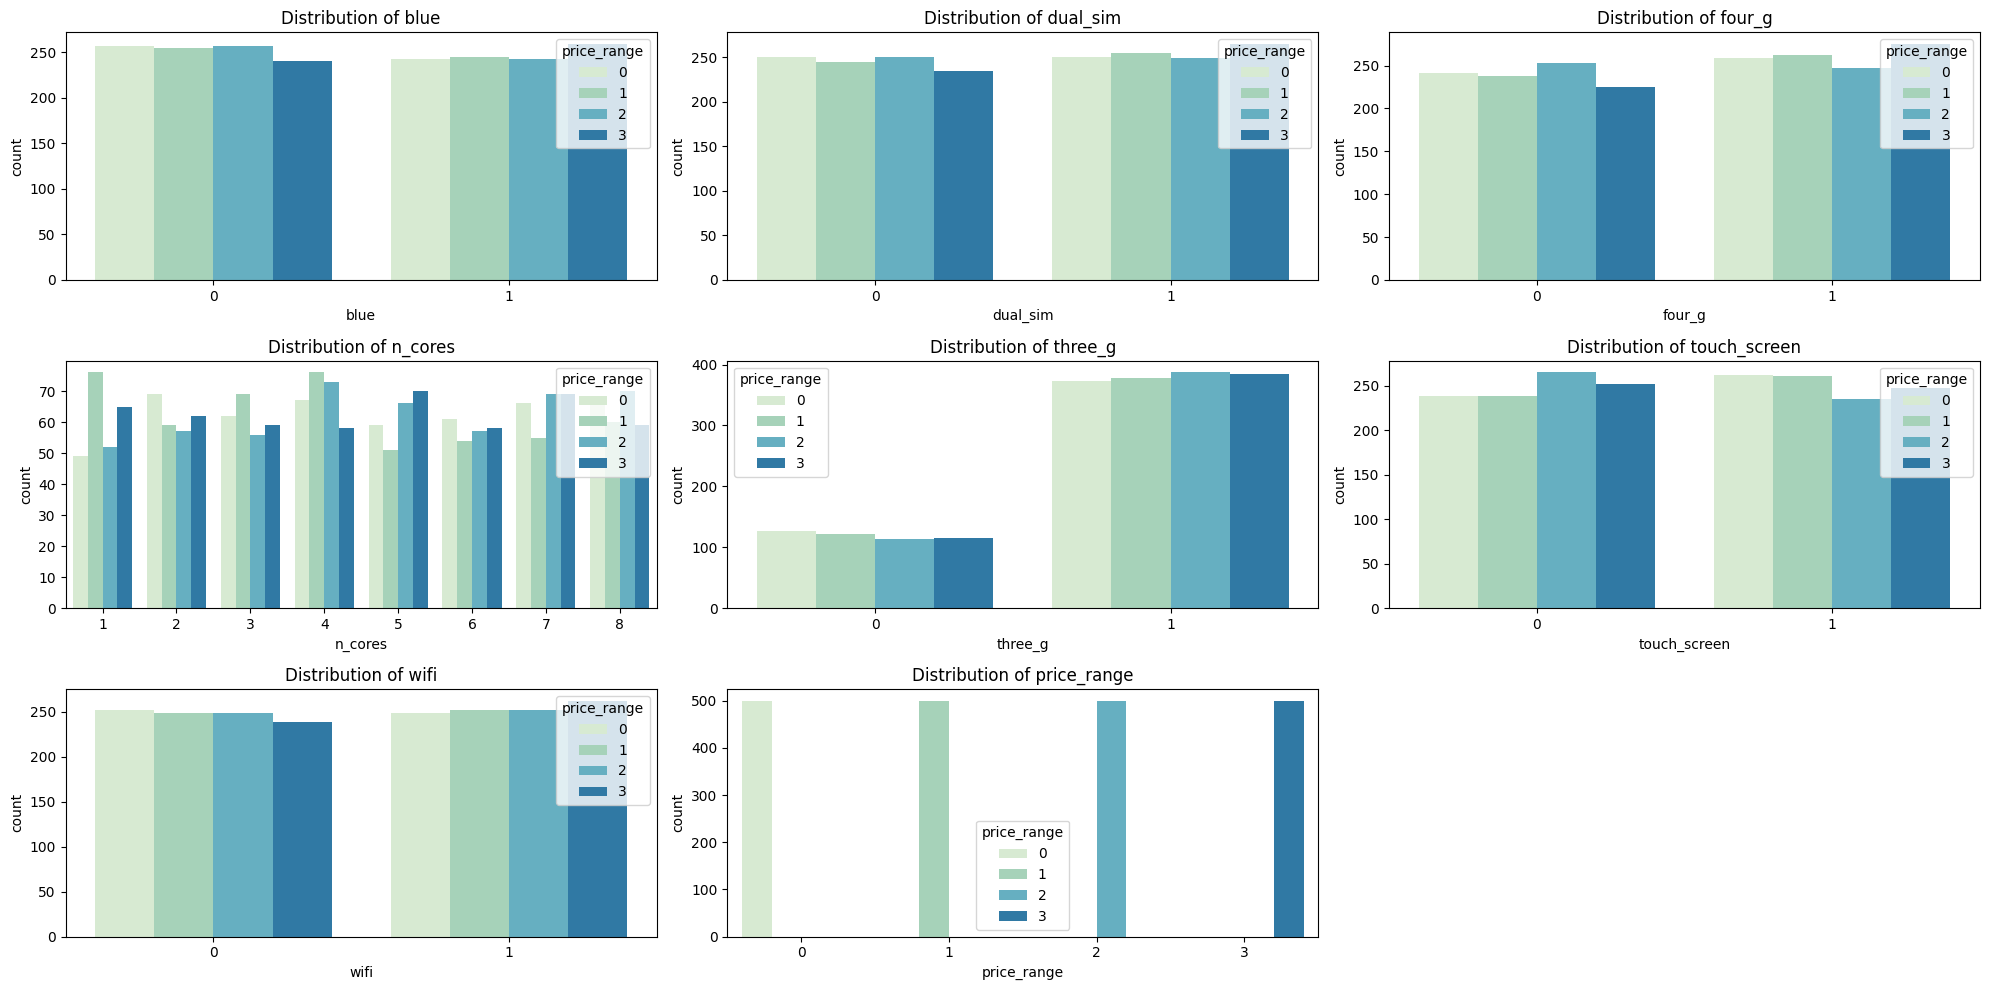

In [23]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

for idx, col in enumerate(cat_columns):
    row = idx // 3  # Determine the row number (0 or 1)
    col_pos = idx % 3  # Determine the column number (0, 1, or 2)
    
    sns.countplot(data = cat_columns, x=col, hue="price_range" , palette='GnBu', ax=axes[row, col_pos])

    # Set title for each subplot
    axes[row, col_pos].set_title(f'Distribution of {col}')

# Turn off the unused 9th subplot
axes[2, 2].axis('off')  # The last subplot is at position (2, 2) in a 3x3 grid

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

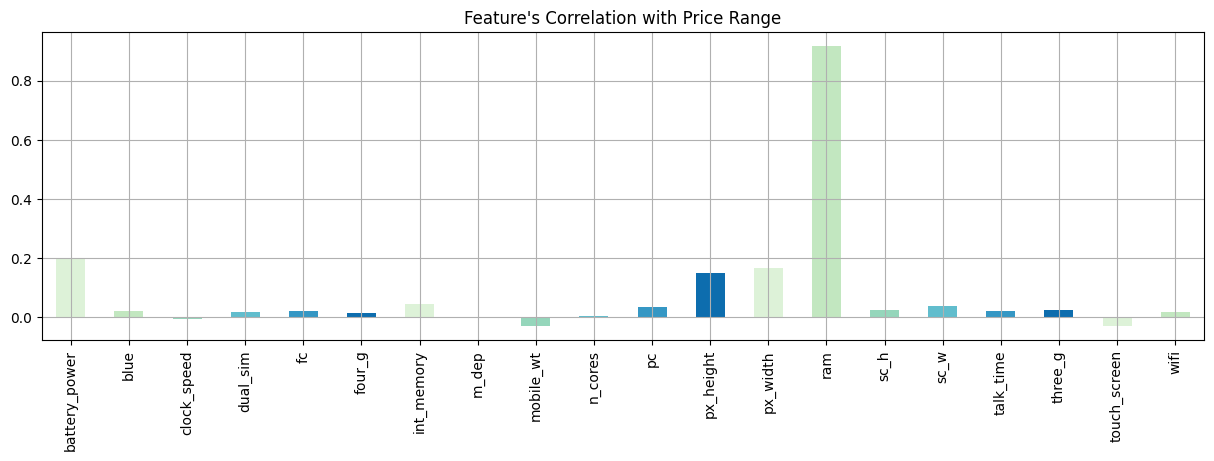

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the color map
colors = sns.color_palette("GnBu")  

# Plot the correlation with price range using the color map
df.drop('price_range', axis=1).corrwith(df.price_range).plot(
    kind='bar',
    grid=True,
    figsize=(15, 4),
    title="Feature's Correlation with Price Range",
    color=colors  # Apply the generated color map
)

# Show the plot
plt.show()


## 7.10. Skewness 
Skewness measures the degree of symmetry of a distribution. The normal distribution is symmetric and has a skewness of zero. If the distribution of a data set instead has a skewness less than zero- negative skewness (left-skewness)- or positive skewness (right-skewness), in such cases, the target variable could indeed be sensitive to those features.

In [25]:
pd.DataFrame({"skewness" : df.skew(axis = 0, skipna = True) })

skewness
battery_power  0.031898
blue           0.020016
clock_speed    0.178084
dual_sim      -0.038035
fc             1.019811
four_g        -0.086144
int_memory     0.057889
m_dep          0.089082
mobile_wt      0.006558
n_cores        0.003628
pc             0.017306
px_height      0.666271
px_width       0.014787
ram            0.006628
sc_h          -0.098884
sc_w           0.633787
talk_time      0.009512
three_g       -1.228142
touch_screen  -0.012009
wifi          -0.028024
price_range    0.000000

## 7.11. Density vs Box plot for numerical variables

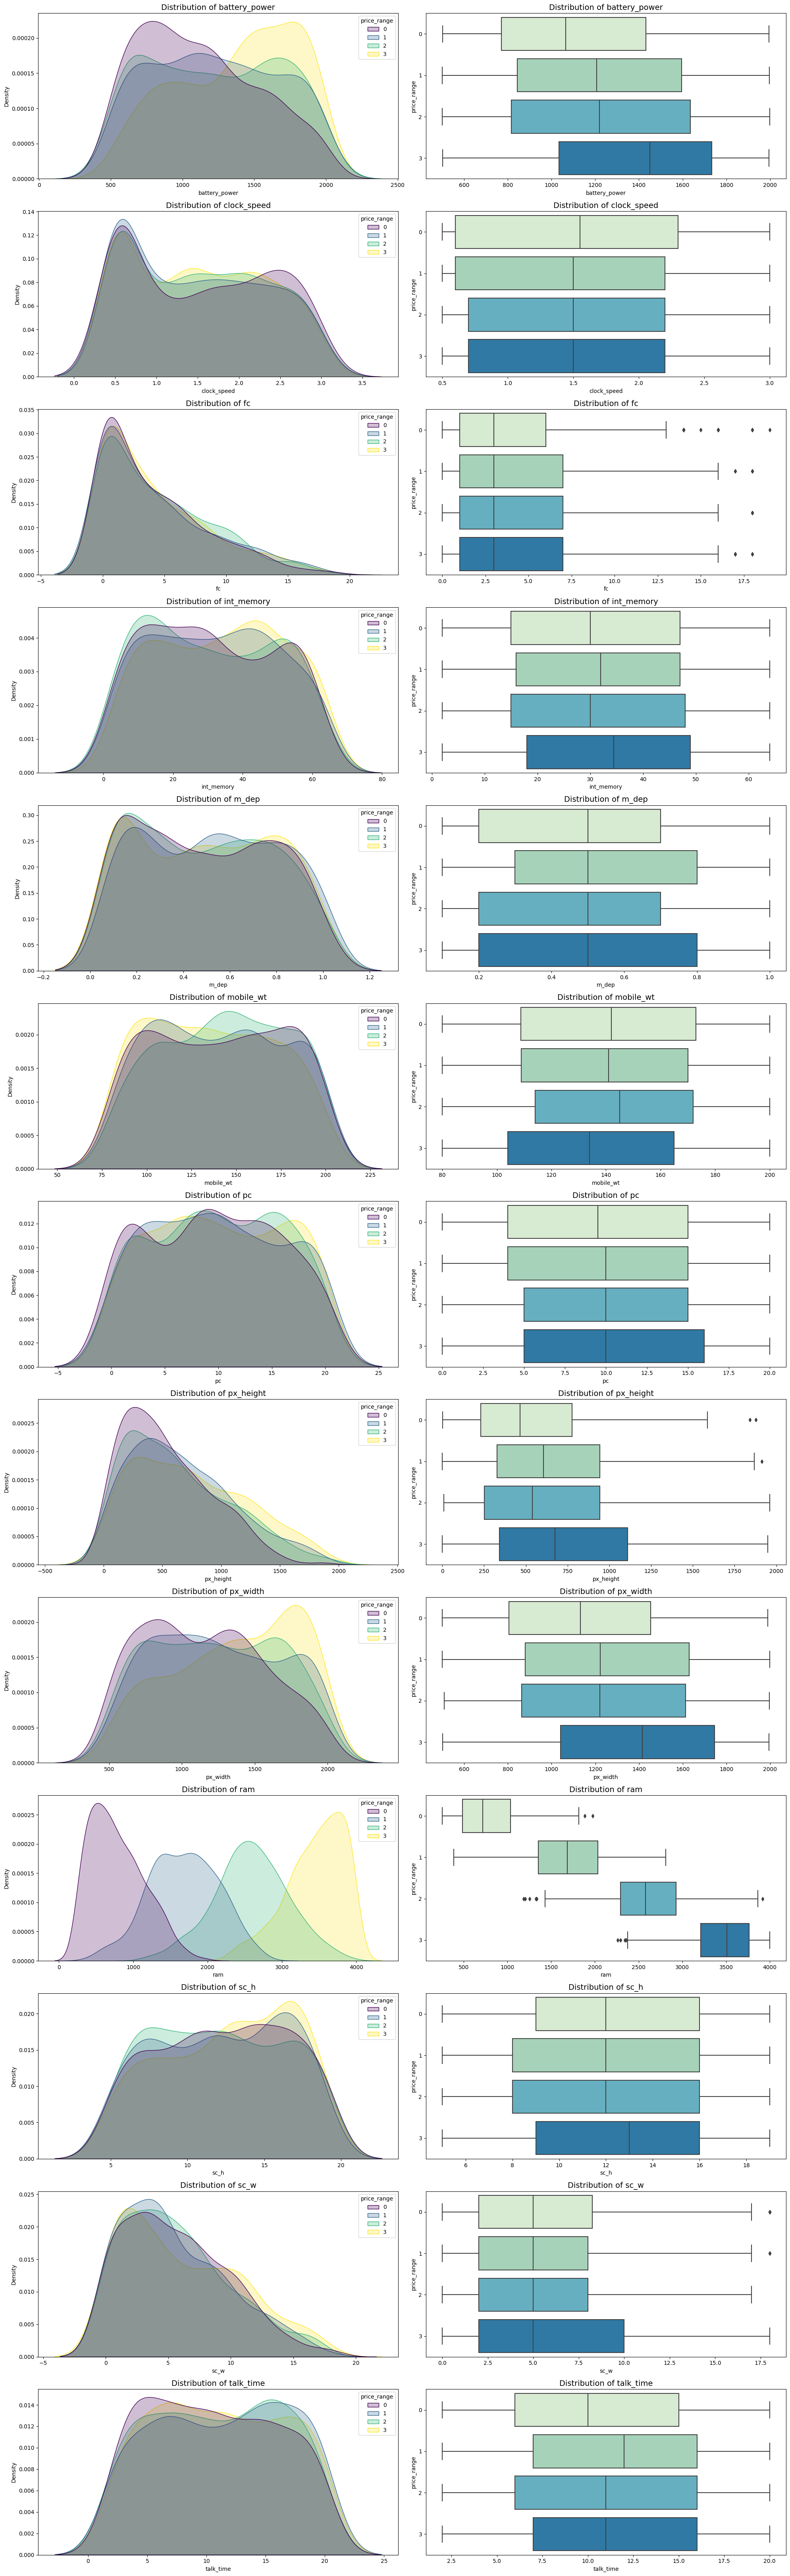

In [26]:

fig, axes = plt.subplots(13, 2, figsize=(20, 65))

# Loop through numerical columns
for idx, col in enumerate(num_columns):
    # Row index
    row = idx  # This is equal to the loop index for each variable

    # KDE plot (first column in the row)
    sns.kdeplot(data= df, x=col, hue="price_range", fill=True, palette="viridis", ax=axes[row, 0])
    axes[row, 0].set_title(f"Distribution of {col}", fontsize=14)

    # Boxplot (second column in the row)
    sns.boxplot(data= df, x=col, y='price_range', palette='GnBu', orient='h',ax=axes[row, 1])
    axes[row, 1].set_title(f"Distribution of {col}", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Obseravtion
Looking at the graph above, we can see that first the ram and then the battery_power, px_height, and px_width have the greatest impact on the target because, with any changes in those features, the price range will change significantly.

## 7.12. Correlation matrix of Variables

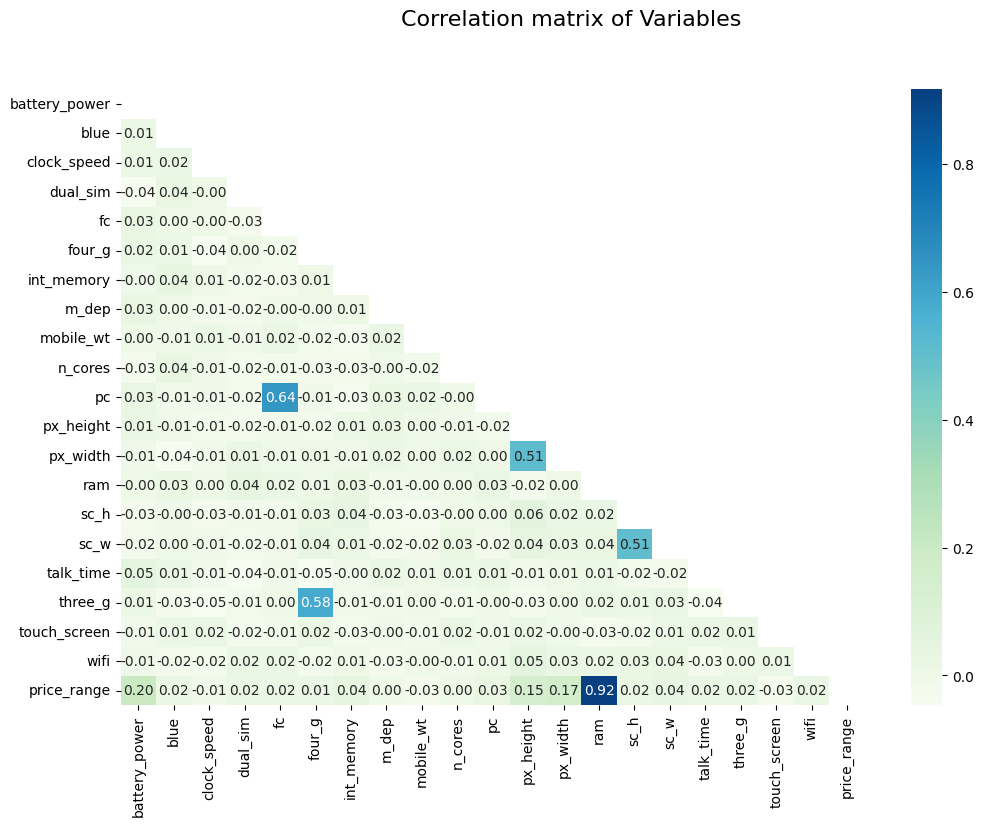

In [27]:
matrix = df.corr()

# Create a figure with a specific size
plt.figure(figsize=(12, 8))

# Plot the heatmap with custom font sizes
sns.heatmap(matrix, cmap='GnBu', fmt='.2f', mask=np.triu(matrix), annot=True, annot_kws={"size": 10})  # Control annotation font size

# Add a title with a custom font size
plt.suptitle("Correlation matrix of Variables", fontsize=16)

# Control the font size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust axis tick font size

# Show the plot
plt.show()


#### Observation:
price_range is highly correlated with ram (0.92).
pc and fc have the highest correlation with each other (ρ = 0.64). 

## 7.13. Noise detection analysis



#### clock-speed

The minimum clock speed in mobile phones generally refers to the lowest frequency at which the processor's cores can operate when conserving energy, typically during idle or low-performance tasks. For modern smartphones, this can vary but is usually between 300 MHz and 800 MHz.

#### fc
A camera with zero megapixels doesn't exist, so we say that the phone does not have a front camera.

#### pc
A primary camera with zero megapixels means the phone does not have a camera, which refers to old phones. 

#### px_height 
Pixel height refers to the vertical measurement of an image in pixels. When pixel height is zero, there is no corresponding pixel for the picture which does not make sense. so we consider 0 as noise. For old mobile phones, the minimum pixel height in centimeters would be around 1.5cm, typically found in phones with a resolution of 176 x 220 pixels translates to a tiny screen size with a low pixel density. So, we set the threshold greater or equal than 1.5. 

#### sc_w
The minimum screen width in centimeters for old mobile phones would be around 4-5 centimeters; this is based on the fact that early mobile phones like the Motorola DynaTAC 8000X had screens that were roughly 1.5 inches wide, which translates to approximately 3.8 centimeters, we consider greater than 1.5. 




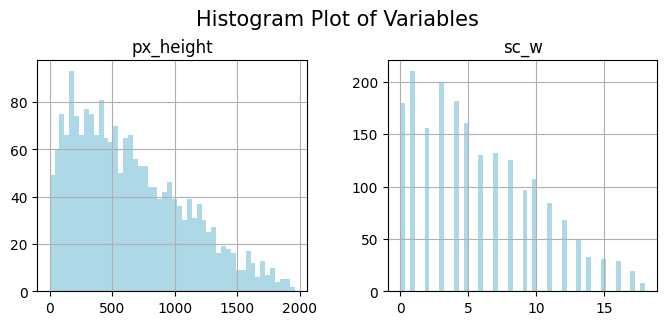

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
df[["px_height","sc_w"]].hist(bins=50, figsize=(8,3) , color='lightblue')
plt.suptitle("Histogram Plot of Variables", fontsize=15 ,  y=1.05)
plt.show()

In [29]:
df = df[df["px_height"] >= 1.5]

In [30]:
df.shape

(1997, 21)

In [31]:
df1 = df[df["sc_w"] > 1.5 ]

In [32]:
df1.shape

(1609, 21)

In [33]:
df1.reset_index(inplace = True)
df1.drop("index", axis = 1, inplace = True)

In [34]:
df1

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1604            858     0          2.2         0   1       0          50   
1605            794     1          0.5         1   0       1           2   
1606           1965     1          2.6         1   0       0          39   
1607           1512     0          0.9         0   4       1          46   
1608            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1604    0.1         84        1  ...        528      1416  3978    17    16   
1605    0.8        106        6  ...       1222      1890   668    13     4   
1606    0.2        187        4  ...        915      1965  2032    11    10   
1607    0.1        145        5  ...        336       670   869    18    10   
1608    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1604          3        1             1     0            3  
1605         19        1             1     0            0  
1606         16        1             1     1            2  
1607         19        1             1     1            0  
1608          2        1             1     1            3  

[1609 rows x 21 columns]

In [35]:
df1["price_range"].value_counts()

price_range
2    408
0    404
1    401
3    396
Name: count, dtype: int64

### Observation:
As we can see, target values are balanced.

## 7.14. Counts of each price range category

In [36]:
price_range_counts = df["price_range"].value_counts()

# Define a list of blue shades for the pie chart
blue_colors = ['#0000FF', '#0000CD', '#006400', '#008080', '#00BFFF'] 

# Create a pie chart with blue color theme and displaying both percentage and count
fig = go.Figure(data=[go.Pie(labels=price_range_counts.index,
                               values=price_range_counts.values,
                               hole=0.3,
                               marker=dict(colors=blue_colors, line=dict(color='white', width=2)),
                               textinfo='label+percent+value',  # Show label, percentage, and count
                               insidetextorientation='horizontal')  # Ensures horizontal text inside pie chart
                             ])
# Adjust the size of the chart
fig.update_layout(
    width=600,  # Set width (in pixels)
    height=600   # Set height (in pixels)
)

# Show the plot
fig.show()

In [37]:
df1.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [38]:
df2 = df1.drop("price_range", axis = 1)

# 8. Normalizing Data

In [39]:
Scaler = MinMaxScaler(feature_range=(0,1))
norm = Scaler.fit_transform(df2)
dfnorm = pd.DataFrame(norm, columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
dfnorm

battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0          0.227789   0.0         0.68       0.0  0.052632     0.0   
1          0.347361   1.0         0.00       1.0  0.000000     1.0   
2          0.041416   1.0         0.00       1.0  0.105263     1.0   
3          0.076152   1.0         0.80       0.0  0.000000     0.0   
4          0.881764   1.0         0.28       0.0  0.684211     1.0   
...             ...   ...          ...       ...       ...     ...   
1604       0.238477   0.0         0.68       0.0  0.052632     0.0   
1605       0.195725   1.0         0.00       1.0  0.000000     1.0   
1606       0.977956   1.0         0.84       1.0  0.000000     0.0   
1607       0.675351   0.0         0.16       0.0  0.210526     1.0   
1608       0.006012   1.0         0.60       1.0  0.263158     1.0   

      int_memory     m_dep  mobile_wt   n_cores    pc  px_height  px_width  \
0       0.080645  0.555556   0.900000  0.142857  0.10   0.009193  0.170895   
1       0.822581  0.666667   0.466667  0.285714  0.30   0.461185  0.993324   
2       0.629032  0.888889   0.541667  0.571429  0.30   0.644025  0.811749   
3       0.129032  0.777778   0.425000  0.714286  0.45   0.620020  0.858478   
4       0.677419  0.555556   0.508333  0.142857  0.70   0.615935  0.475300   
...          ...       ...        ...       ...   ...        ...       ...   
1604    0.774194  0.000000   0.033333  0.000000  0.10   0.268641  0.611482   
1605    0.000000  0.777778   0.216667  0.714286  0.70   0.623085  0.927904   
1606    0.596774  0.111111   0.891667  0.428571  0.15   0.466292  0.977971   
1607    0.709677  0.000000   0.541667  0.571429  0.25   0.170582  0.113485   
1608    0.693548  0.888889   0.733333  0.714286  0.80   0.245659  0.169559   

           ram      sc_h    sc_w  talk_time  three_g  touch_screen  wifi  
0     0.612774  0.285714  0.3125   0.944444      0.0           0.0   1.0  
1     0.634687  0.857143  0.0625   0.277778      1.0           1.0   0.0  
2     0.627205  0.428571  0.0000   0.388889      1.0           1.0   0.0  
3     0.671566  0.785714  0.3750   0.500000      1.0           0.0   0.0  
4     0.308658  0.214286  0.0000   0.722222      1.0           1.0   0.0  
...        ...       ...     ...        ...      ...           ...   ...  
1604  0.994655  0.857143  0.8750   0.055556      1.0           1.0   0.0  
1605  0.110102  0.571429  0.1250   0.944444      1.0           1.0   0.0  
1606  0.474613  0.428571  0.5000   0.777778      1.0           1.0   1.0  
1607  0.163816  0.928571  0.5000   0.944444      1.0           1.0   1.0  
1608  0.978888  1.000000  0.1250   0.000000      1.0           1.0   1.0  

[1609 rows x 20 columns]

In [40]:
X = dfnorm
y = df1["price_range"].values.reshape(-1,1)

# 9. Algorithm's Analysis

## 9.1. Decision Tree Classifier

### 9.1.1. Apply different hyper parameters  to find the best accuracy

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define hyperparameter grid for Decision Tree
param_grid = {
    "splitter": ["best", "random"],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.arange(1, 9),    
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=0)  


# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(DT, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_DT = grid_search.best_estimator_

# Make predictions on the test set
y_pred_DT = best_DT.predict(X_test)

# Print performance metrics
print(f"Best Hyperparameters: {grid_search.best_params_}")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_DT))

print("Classification Report:\n", classification_report(y_test, y_pred_DT))

print("Precision:", precision_score(y_test, y_pred_DT, average='macro'))
print("Recall:", recall_score(y_test, y_pred_DT, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_DT, average='macro'))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy: 0.84472049689441
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        81
           1       0.85      0.72      0.78        80
           2       0.76      0.83      0.79        82
           3       0.91      0.86      0.88        79

    accuracy                           0.84       322
   macro avg       0.85      0.84      0.84       322
weighted avg       0.85      0.84      0.84       322

Precision: 0.8478919732687082
Recall: 0.844497687329194
F1 Score: 0.8438113500357002



#### Recommendations:
Macro Average: Use if your classes are balanced and you want to treat each class equally. Weighted Average: Use if your classes are imbalanced and you want to account for the frequency of each class.

Micro Average: Use if you're more interested in the overall prediction performance, rather than the performance of individual classes.

For Random Forest, it is common to report weighted or macro averages for multiclass classification, depending on whether the class distribution is balanced or imbalanced.

In [42]:
MAE = metrics.mean_absolute_error(y_test, y_pred_DT)
MSE = metrics.mean_squared_error(y_test, y_pred_DT)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT))
R2 =  metrics.r2_score(y_test, y_pred_DT)
Acc_DT =  metrics.accuracy_score(y_test, y_pred_DT)

In [43]:
metrics_dict = {

    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value(DT)': [MAE, MSE, RMSE, R2]

}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

Metric  Value(DT)
0    MAE   0.155280
1    MSE   0.155280
2   RMSE   0.394055
3     R2   0.875152

In [44]:
Acc_dict = {
    'Model': ['Decision Tree'],
    'Accuracy': [Acc_DT]
}

Acc_df = pd.DataFrame(Acc_dict)
Acc_df

Model  Accuracy
0  Decision Tree   0.84472

In [45]:
best_DT.classes_

array([0, 1, 2, 3])

### 9.1.2. Confusion Matrix for dataset

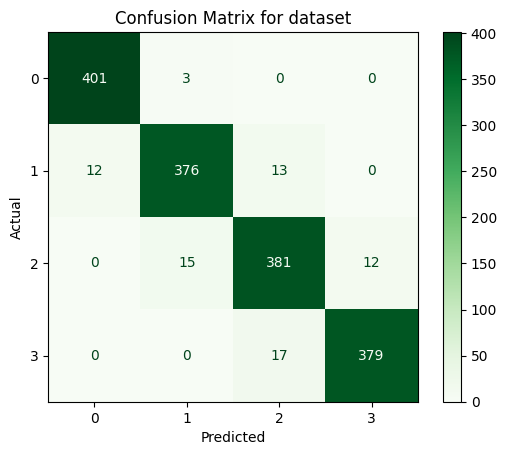

In [46]:
cm = confusion_matrix (y, best_DT.predict(X))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_DT.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for dataset')
plt.show()

### 9.1.3. Confusion Matrix for test set

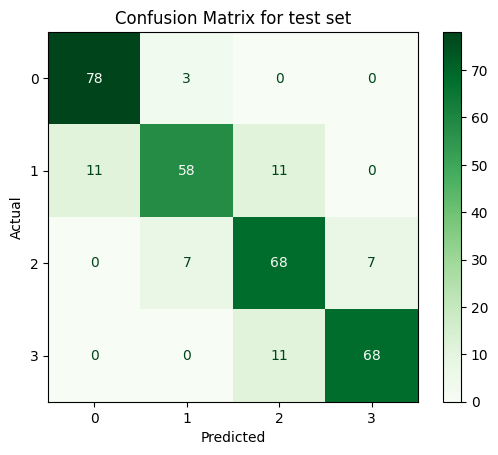

In [47]:
cm = confusion_matrix (y_test, y_pred_DT)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_DT.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for test set')
plt.show()

### 9.1.4. Confusion Matrix Report

In [48]:
cm_resampled = confusion_matrix(y, best_DT.predict(X))
print("Confusion Matrix:")
print(cm_resampled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y, best_DT.predict(X)))

Confusion Matrix:
[[401   3   0   0]
 [ 12 376  13   0]
 [  0  15 381  12]
 [  0   0  17 379]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       404
           1       0.95      0.94      0.95       401
           2       0.93      0.93      0.93       408
           3       0.97      0.96      0.96       396

    accuracy                           0.96      1609
   macro avg       0.96      0.96      0.96      1609
weighted avg       0.96      0.96      0.96      1609



## 9.2. Random Forest Classifier

### 9.2.1. Apply different hyper parameters  to find the best accuracy

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define hyperparameter grid for Decision Tree
param_grid = {
    'n_estimators': [100, 150, 200],          # Number of trees in the forest
    "criterion": ["gini", "entropy", "log_loss"],
    'max_features': [None, 'sqrt', 'log2'], # Number of features to consider at each split
    "max_depth": np.arange(5, 15),          # Maximum depth of the tree
    'min_samples_split': [2, 3, 4],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]             # Minimum number of samples required to be at a leaf node
}


# Initialize Decision Tree Classifier
RF = RandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(RF, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_RF = grid_search.best_estimator_

# Make predictions on the test set
y_pred_RF = best_RF.predict(X_test)

# Print performance metrics
print(f"Best Hyperparameters: {grid_search.best_params_}")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_RF))

print("Classification Report:\n", classification_report(y_test, y_pred_RF))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8944099378881988
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        81
           1       0.93      0.80      0.86        80
           2       0.85      0.90      0.88        82
           3       0.92      0.91      0.92        79

    accuracy                           0.89       322
   macro avg       0.90      0.89      0.89       322
weighted avg       0.90      0.89      0.89       322



In [50]:
MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
MSE = metrics.mean_squared_error(y_test, y_pred_RF)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
R2 =  metrics.r2_score(y_test, y_pred_RF)
Acc_RF =  metrics.accuracy_score(y_test, y_pred_RF)

In [51]:
metrics_dict1 = {

    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value(DT)': [MAE, MSE, RMSE, R2]

}

# Create a DataFrame
metrics_df1 = pd.DataFrame(metrics_dict1)
metrics_df1

Metric  Value(DT)
0    MAE   0.105590
1    MSE   0.105590
2   RMSE   0.324946
3     R2   0.915103

In [52]:
Acc_dict1 = {
    'Model': ['Random Forest'],
    'Accuracy': [Acc_RF]
}

Acc_df1 = pd.DataFrame(Acc_dict1)
Acc_df1

Model  Accuracy
0  Random Forest   0.89441

In [53]:
best_RF.classes_

array([0, 1, 2, 3])

### 9.2.2. Confusion Matrix for dataset

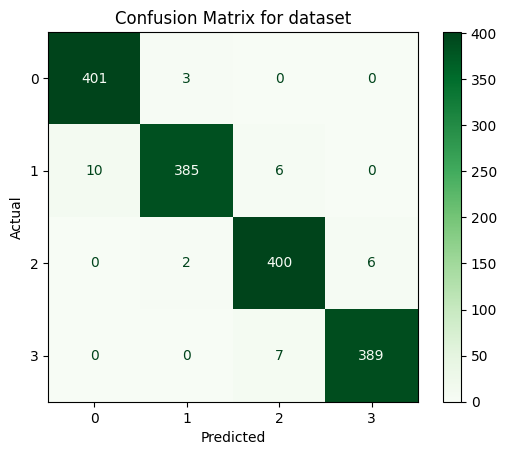

In [54]:
cm = confusion_matrix (y, best_RF.predict(X))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_RF.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for dataset')
plt.show()

### 9.2.3. Confusion Matrix test set

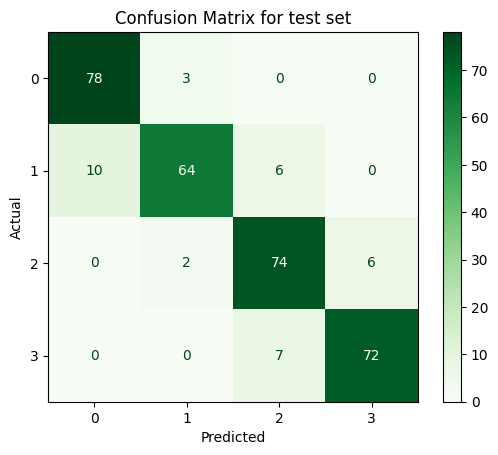

In [55]:
cm = confusion_matrix (y_test, y_pred_RF)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_RF.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for test set')
plt.show()

### 9.2.4. Confusion Matrix Report

In [56]:
cm_resampled = confusion_matrix(y, best_RF.predict(X))
print("Confusion Matrix:")
print(cm_resampled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y, best_RF.predict(X)))

Confusion Matrix:
[[401   3   0   0]
 [ 10 385   6   0]
 [  0   2 400   6]
 [  0   0   7 389]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       404
           1       0.99      0.96      0.97       401
           2       0.97      0.98      0.97       408
           3       0.98      0.98      0.98       396

    accuracy                           0.98      1609
   macro avg       0.98      0.98      0.98      1609
weighted avg       0.98      0.98      0.98      1609



## 9.3. SVM

### 9.3.1. Apply different hyper parameters to find the best accuracy

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Initialize Decision Tree Classifier
SVM = SVC(probability=True, random_state=42)  


# defining parameter range 
param_grid = [{'kernel': ['linear'], 
               'C': [0.1, 1, 10, 100, 1000]}, 

             {'kernel': ['poly'],
              'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto']  + [1, 0.1, 0.01, 0.001, 0.0001], 
              'degree': [2, 3, 4, 5]}, 

             {'kernel': ['rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto']  + [1, 0.1, 0.01, 0.001, 0.0001]}]


# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(SVM, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_SVM = grid_search.best_estimator_

# Make predictions on the test set
y_pred_SVM = best_SVM.predict(X_test)

# Print performance metrics
print(f"Best Hyperparameters: {grid_search.best_params_}")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_SVM))

print("Classification Report:\n", classification_report(y_test, y_pred_SVM))

print("Precision:", precision_score(y_test, y_pred_SVM, average='macro'))
print("Recall:", recall_score(y_test, y_pred_SVM, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_SVM, average='macro'))


Best Hyperparameters: {'C': 1000, 'kernel': 'linear'}
Accuracy: 0.953416149068323
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        81
           1       0.96      0.93      0.94        80
           2       0.96      0.93      0.94        82
           3       0.95      0.97      0.96        79

    accuracy                           0.95       322
   macro avg       0.95      0.95      0.95       322
weighted avg       0.95      0.95      0.95       322

Precision: 0.9537145080083773
Recall: 0.9535417833960337
F1 Score: 0.9532824899511009


In [58]:
MAE = metrics.mean_absolute_error(y_test, y_pred_SVM)
MSE = metrics.mean_squared_error(y_test, y_pred_SVM)
RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVM))
R2 =  metrics.r2_score(y_test, y_pred_SVM)
Acc_SVM =  metrics.accuracy_score(y_test, y_pred_SVM)

In [59]:
metrics_dict2 = {

    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value(DT)': [MAE, MSE, RMSE, R2]

}

# Create a DataFrame
metrics_df2 = pd.DataFrame(metrics_dict2)
metrics_df2

Metric  Value(DT)
0    MAE   0.046584
1    MSE   0.046584
2   RMSE   0.215833
3     R2   0.962546

In [60]:
Acc_dict2 = {
    'Model': ['SVM'],
    'Accuracy': [Acc_SVM]
}

Acc_df2 = pd.DataFrame(Acc_dict2)
Acc_df2

Model  Accuracy
0   SVM  0.953416

In [61]:
best_SVM.classes_

array([0, 1, 2, 3])

### 9.3.2. Confusion Matrix for dataset

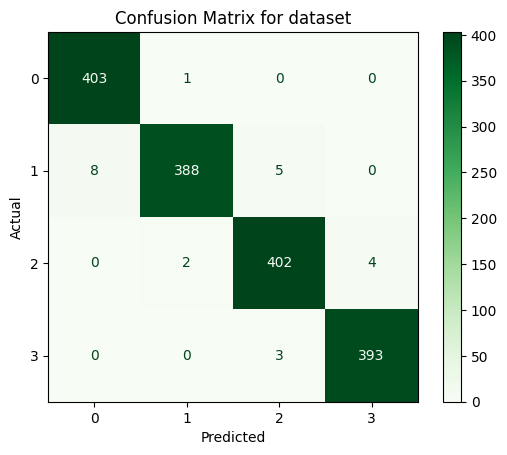

In [62]:
cm = confusion_matrix (y, best_SVM.predict(X))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_SVM.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for dataset')
plt.show()

### 9.3.3. Confusion Matrix for test set

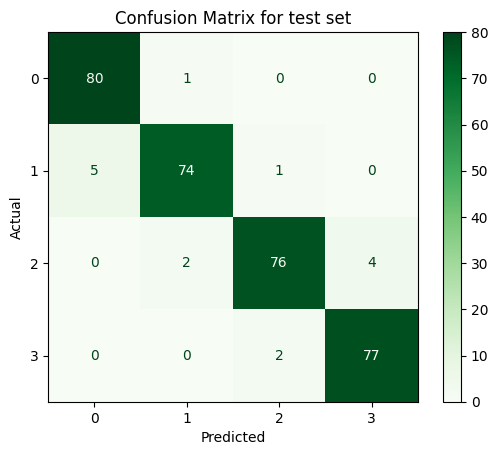

In [63]:
cm = confusion_matrix (y_test, y_pred_SVM)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_SVM.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for test set')
plt.show()

### 9.3.4. Confusion Matrix Report

In [64]:
cm_resampled = confusion_matrix(y, best_SVM.predict(X))
print("Confusion Matrix:")
print(cm_resampled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y, best_SVM.predict(X)))

Confusion Matrix:
[[403   1   0   0]
 [  8 388   5   0]
 [  0   2 402   4]
 [  0   0   3 393]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       404
           1       0.99      0.97      0.98       401
           2       0.98      0.99      0.98       408
           3       0.99      0.99      0.99       396

    accuracy                           0.99      1609
   macro avg       0.99      0.99      0.99      1609
weighted avg       0.99      0.99      0.99      1609



# 10. Model Comparison

In [65]:
compare_models = pd.concat([Acc_df, Acc_df1, Acc_df2], axis = 1)
compare_models

Model  Accuracy          Model  Accuracy Model  Accuracy
0  Decision Tree   0.84472  Random Forest   0.89441   SVM  0.953416

### Observtion

SVM is doing better than other two models

# 11. Prediction

## 11.1. Create dataframe

In [66]:
df_test = pd.DataFrame(test)
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

## 11.2. Apply same train set preprocessing for test set

In [67]:
df_test = df_test[df_test["px_height"] >= 1.5]

In [68]:
df1_test = df_test[df_test["sc_w"] > 1.5 ]

In [69]:
df1_test.shape

(787, 21)

In [70]:
df1_test.reset_index(inplace = True)

In [71]:
df1_test

index    id  battery_power  blue  clock_speed  dual_sim  fc  four_g  \
0        0     1           1043     1          1.8         1  14       0   
1        2     3           1807     1          2.8         0   1       0   
2        4     5           1434     0          1.4         0  11       1   
3        5     6           1464     1          2.9         1   5       1   
4        6     7           1718     0          2.4         0   1       0   
..     ...   ...            ...   ...          ...       ...  ..     ...   
782    993   994            567     1          2.7         1  14       1   
783    994   995            936     1          1.4         1   0       0   
784    995   996           1700     1          1.9         0   0       1   
785    998   999           1533     1          0.5         1   0       0   
786    999  1000           1270     1          0.5         0   4       1   

     int_memory  m_dep  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0             5    0.1  ...  16        226      1412  3476    12     7   
1            27    0.9  ...   4       1270      1366  2396    17    10   
2            49    0.5  ...  18        749       810  1773    15     8   
3            50    0.8  ...   9        569       939  3506    10     7   
4            47    1.0  ...   3       1283      1374  3873    14     2   
..          ...    ...  ...  ..        ...       ...   ...   ...   ...   
782          56    0.4  ...  17        555      1290   336     7     6   
783          46    0.8  ...   0        265       886   684     8     5   
784          54    0.5  ...  17        644       913  2121    14     8   
785          50    0.4  ...  12         38       832  2509    15    11   
786          35    0.1  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1           10        0             1     1  
2            7        1             0     1  
3            3        1             1     1  
4           10        0             0     0  
..         ...      ...           ...   ...  
782          7        1             1     1  
783         12        1             1     1  
784         15        1             1     0  
785          6        0             1     0  
786          3        1             0     1  

[787 rows x 22 columns]

In [72]:
df1_test.drop(columns=["index", "id"], inplace=True, errors='ignore')

In [73]:
df1_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1             1807     1          2.8         0   1       0          27   
2             1434     0          1.4         0  11       1          49   
3             1464     1          2.9         1   5       1          50   
4             1718     0          2.4         0   1       0          47   
..             ...   ...          ...       ...  ..     ...         ...   
782            567     1          2.7         1  14       1          56   
783            936     1          1.4         1   0       0          46   
784           1700     1          1.9         0   0       1          54   
785           1533     1          0.5         1   0       0          50   
786           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.9        186        3   4       1270      1366  2396    17    10   
2      0.5        108        6  18        749       810  1773    15     8   
3      0.8        198        8   9        569       939  3506    10     7   
4      1.0        156        2   3       1283      1374  3873    14     2   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
782    0.4        165        8  17        555      1290   336     7     6   
783    0.8        139        2   0        265       886   684     8     5   
784    0.5        170        7  17        644       913  2121    14     8   
785    0.4        171        2  12         38       832  2509    15    11   
786    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1           10        0             1     1  
2            7        1             0     1  
3            3        1             1     1  
4           10        0             0     0  
..         ...      ...           ...   ...  
782          7        1             1     1  
783         12        1             1     1  
784         15        1             1     0  
785          6        0             1     0  
786          3        1             0     1  

[787 rows x 20 columns]

## 11.3. Normalize Data

In [74]:
Scaler = MinMaxScaler(feature_range=(0,1))
norm_new = Scaler.fit_transform(df1_test)
df_norm_test = pd.DataFrame(norm_new, columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
df_norm_test

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0         0.362241   1.0         0.52       1.0  0.736842     0.0    0.048387   
1         0.871915   1.0         0.92       0.0  0.052632     0.0    0.403226   
2         0.623082   0.0         0.36       0.0  0.578947     1.0    0.758065   
3         0.643095   1.0         0.96       1.0  0.263158     1.0    0.774194   
4         0.812542   0.0         0.76       0.0  0.052632     0.0    0.725806   
..             ...   ...          ...       ...       ...     ...         ...   
782       0.044696   1.0         0.88       1.0  0.736842     1.0    0.870968   
783       0.290861   1.0         0.36       1.0  0.000000     0.0    0.709677   
784       0.800534   1.0         0.56       0.0  0.000000     1.0    0.838710   
785       0.689126   1.0         0.00       1.0  0.000000     0.0    0.774194   
786       0.513676   1.0         0.00       0.0  0.210526     1.0    0.532258   

        m_dep  mobile_wt   n_cores    pc  px_height  px_width       ram  \
0    0.000000   0.941667  0.285714  0.80   0.117585  0.608550  0.862319   
1    0.888889   0.883333  0.285714  0.20   0.665617  0.577822  0.572464   
2    0.444444   0.233333  0.714286  0.90   0.392126  0.206413  0.405260   
3    0.777778   0.983333  1.000000  0.45   0.297638  0.292585  0.870370   
4    1.000000   0.633333  0.142857  0.15   0.672441  0.583166  0.968867   
..        ...        ...       ...   ...        ...       ...       ...   
782  0.333333   0.708333  1.000000  0.85   0.290289  0.527054  0.019592   
783  0.777778   0.491667  0.142857  0.00   0.138058  0.257181  0.112990   
784  0.444444   0.750000  0.857143  0.85   0.337008  0.275217  0.498658   
785  0.333333   0.758333  0.142857  0.60   0.018898  0.221109  0.602791   
786  0.000000   0.500000  0.714286  0.95   0.238845  0.071476  0.688406   

         sc_h    sc_w  talk_time  three_g  touch_screen  wifi  
0    0.500000  0.3125   0.000000      0.0           1.0   0.0  
1    0.857143  0.5000   0.444444      0.0           1.0   1.0  
2    0.714286  0.3750   0.277778      1.0           0.0   1.0  
3    0.357143  0.3125   0.055556      1.0           1.0   1.0  
4    0.642857  0.0000   0.444444      0.0           0.0   0.0  
..        ...     ...        ...      ...           ...   ...  
782  0.142857  0.2500   0.277778      1.0           1.0   1.0  
783  0.214286  0.1875   0.555556      1.0           1.0   1.0  
784  0.642857  0.3750   0.722222      1.0           1.0   0.0  
785  0.714286  0.5625   0.222222      0.0           1.0   0.0  
786  0.285714  0.0000   0.055556      1.0           0.0   1.0  

[787 rows x 20 columns]

## 11.4. Get predictions from each classifier

In [75]:
pred_svm = best_DT.predict(df_norm_test)
pred_rf = best_RF.predict(df_norm_test)
pred_dt = best_SVM.predict(df_norm_test)

## 11.5. Create a DataFrame with the predictions

In [76]:
predictions_df = pd.DataFrame({
    'SVM': pred_svm,
    'Random Forest': pred_rf,
    'Decision Tree': pred_dt
})

## 11.6. Calculate the majority vote by taking the mode of each row

In [77]:
predictions_df['Majority Vote'] = predictions_df.mode(axis=1)[0]

# Get the final predictions
final_predictions = predictions_df['Majority Vote']

## 11.7. Final Prediction

In [78]:
final_predictions = pd.DataFrame(final_predictions)
final_predictions

Majority Vote
0                3
1                2
2                1
3                3
4                3
..             ...
782              0
783              0
784              2
785              2
786              2

[787 rows x 1 columns]

## Done!